# Experiments with Kernelelized Stein discrepancy

In [1]:
import jax.numpy as np
from jax import grad, jit, vmap
from jax import random, jacfwd, jacrev
from jax.lib import xla_bridge
print(xla_bridge.get_backend().platform)

import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm

from svgd import SVGD
from utils import dict_concatenate, dict_mean, ard
from utils import squared_distance_matrix

cpu


/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:123: UserWarning: No GPU/TPU found, falling back to CPU.
  warnings.warn('No GPU/TPU found, falling back to CPU.')


In [2]:
from metrics import ksd

In [3]:
n=100
d=1
stepsize = 0.01
n_iter_max = 500 # grid_length = 25
bandwidth = 1

# from utils import log_gaussian_mixture
# logp = lambda x: log_gaussian_mixture(x, means=[-2, 2], variances=[1, 1], weights=[1/3, 2/3])
from jax.scipy.stats import norm

@jit
def logp(x):
    assert x.ndim == 1
    return np.sum(norm.logpdf(x, loc=0, scale=1)) 

In [4]:
svgd_fix = SVGD(logp=logp, n_iter_max=n_iter_max, adaptive_kernel=False, get_bandwidth=None, particle_shape=(n, d))

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lib/xla_bridge.py:123: UserWar

# Effect of varying KSD bandwidth on KSD

In [5]:
h = 1
xout, log = svgd_fix.svgd(svgd_fix.rkey, stepsize, bandwidth=h, n_iter=n_iter_max)
grid_length = 30
bandwidth_grid = np.logspace(-1, 3, num=grid_length, base=2)
# bandwidth_grid = np.logspace(-0.5, 2, num=grid_length)
ksds = np.array([ksd(xout, logp, h) for h in bandwidth_grid])

JIT COMPILING...
Done compiling in 0.39513325691223145 seconds.


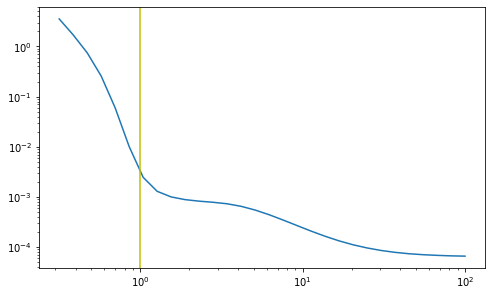

In [37]:
_ = plt.plot(bandwidth_grid, ksds)
plt.xscale("log")
plt.yscale("log")
plt.axvline(x=h, color="y")

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


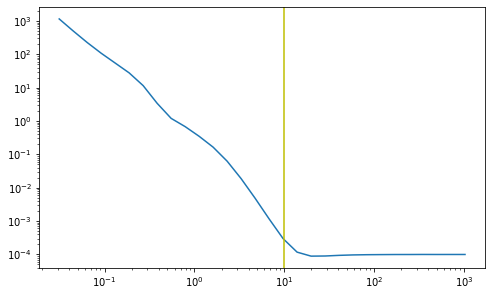

In [11]:
h = 10
xout, log = svgd_fix.svgd(x0, stepsize, bandwidth=h, n_iter=140)

grid_length = 30
bandwidth_grid = np.logspace(-5, 10, num=grid_length, base=2)
ksds = np.array([ksd(xout, logp, h) for h in bandwidth_grid])

_ = plt.plot(bandwidth_grid, ksds)
plt.xscale("log")
plt.yscale("log")
plt.axvline(x=h, color="y")

COMPILING


/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


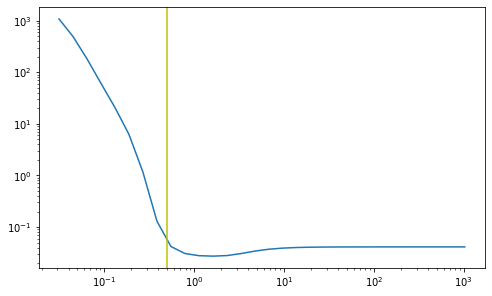

In [12]:
h = 0.5
xout, log = svgd_fix.svgd(x0, stepsize, bandwidth=h, n_iter=140)

grid_length = 30
bandwidth_grid = np.logspace(-5, 10, num=grid_length, base=2)
ksds = np.array([ksd(xout, logp, h) for h in bandwidth_grid])

_ = plt.plot(bandwidth_grid, ksds)
plt.xscale("log")
plt.yscale("log")
plt.axvline(x=h, color="y")

/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in asarray is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))
/home/lauro/.virtualenvs/msc-thesis/lib/python3.6/site-packages/jax/lax/lax.py:4670: UserWarning: Explicitly requested dtype float64 requested in array is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  warnings.warn(msg.format(dtype, fun_name , truncated_dtype))


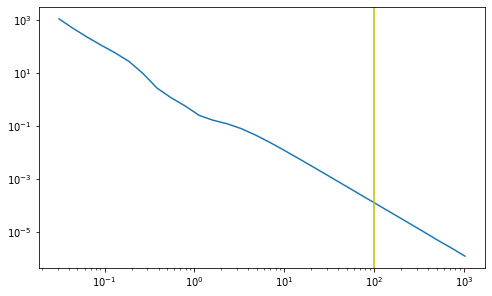

In [13]:
h = 10**2
xout, log = svgd_fix.svgd(x0, stepsize, bandwidth=h, n_iter=140)

grid_length = 30
bandwidth_grid = np.logspace(-5, 10, num=grid_length, base=2)
ksds = np.array([ksd(xout, logp, h) for h in bandwidth_grid])

_ = plt.plot(bandwidth_grid, ksds)
plt.xscale("log")
plt.yscale("log")
plt.axvline(x=h, color="y")